# SYDE 556/750 --- Assignment 4
**Student ID: 20654471**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE is: 0.003833559091056572


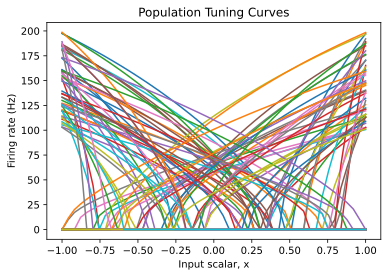

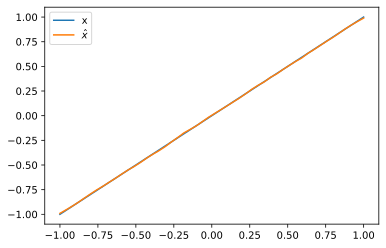

In [2]:
# ✍ 
numNeurons = 100 
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02


def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())

model = nengo.Network()
with model: 
    ensemble1 = nengo.Ensemble(numNeurons, dimensions = dimensions, max_rates = nengo.dists.Uniform(100,200), 
                               neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))
    
    dummyConnection = nengo.Connection(ensemble1, ensemble1)
    
with nengo.Simulator(model) as sim:
    evalPoints, activities = tuning_curves(ensemble1, sim)
    decoder = sim.data[dummyConnection].weights.T

xhat = np.dot(activities, decoder)
    
plt.figure()
plt.plot(evalPoints, activities)
plt.title("Population Tuning Curves")
plt.xlabel("Input scalar, x")
plt.ylabel("Firing rate (Hz)")

plt.figure()
plt.plot(evalPoints, evalPoints, label = "x")
plt.plot(evalPoints, xhat, label = "$\hat{x}$")
plt.legend()

RMSE = rootMeanSquared(evalPoints, xhat)

print("RMSE is: " + str(RMSE))


    

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 0.500000 is: 0.0017491509544589588


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 1.000000 is: 0.0034983019089179176


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 2.000000 is: 0.006996603817835835


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.01399320763567167


Text(0, 0.5, 'Root Meam Squared Error')

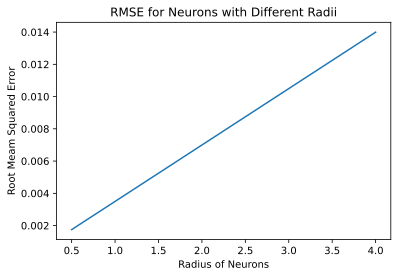

In [3]:
# ✍ 
numNeurons = 100
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
radiuses = [0.5,1,2,4]
RMSEs = []

def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())

for radii in radiuses:
    model = nengo.Network(seed = 18945)
    with model: 
        ensemble1 = nengo.Ensemble(numNeurons, dimensions = dimensions, radius = radii, max_rates = nengo.dists.Uniform(100,200),
                                   neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

        dummyConnection = nengo.Connection(ensemble1, ensemble1)

    with nengo.Simulator(model) as sim:
        evalPoints, activities = tuning_curves(ensemble1, sim)
        decoder = sim.data[dummyConnection].weights.T

    xhat = np.dot(activities, decoder)

    RMSE = rootMeanSquared(evalPoints, xhat)

    print("RMSE  for radius %f is: " %(radii)  + str(RMSE))
    
    RMSEs.append(RMSE)
    

plt.figure()
plt.title("RMSE for Neurons with Different Radii")
plt.plot(radiuses, RMSEs)
plt.xlabel('Radius of Neurons')
plt.ylabel('Root Meam Squared Error')



**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

✍ 
The mathematical relationship between radius and RMSE is actually quite simple. As seen from the above graph the relationship is a linear one. Specifically it is of the form RMSE = RadiusOfNeurons*m where m is 0.0034983019089179176 for this population of neurons. Obviously it makes sense that as the radius of the neurons increases the error should increase as the same number of neurons must cover a larger state space. In terms of why it increases linearly I am not exactly sure, but I imagine it has to do with the fact that the input x axis of the tuning curves increases in size linearly? 

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.0030225322691200766


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.0034983019089179176


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.004471675590423574


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.00619363450046167


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.009337165592110827


Text(0, 0.5, 'Root Meam Squared Error')

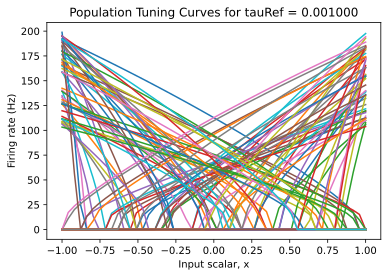

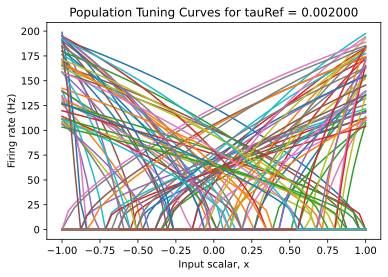

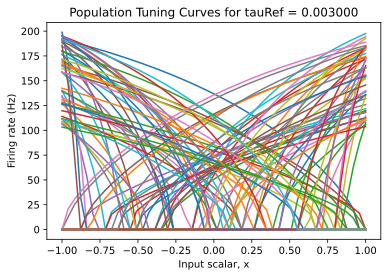

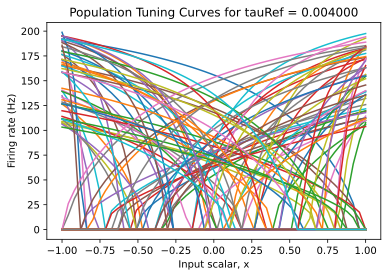

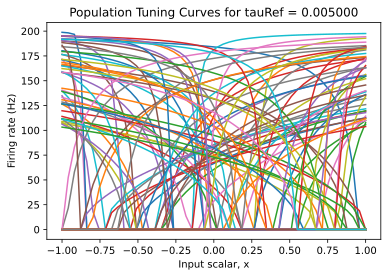

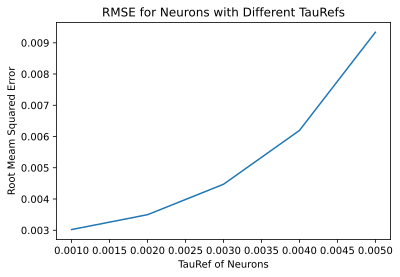

In [4]:
# ✍ 
numNeurons = 100
dimensions =1 
radius = 1
tauRefs = [0.001, 0.002, 0.003, 0.004, 0.005]
tauRC = 0.02
radius = 1
RMSEs = []

def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())

for tauRef in tauRefs:
    model = nengo.Network(seed = 18945)
    with model: 
        ensemble1 = nengo.Ensemble(numNeurons, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                                  neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

        dummyConnection = nengo.Connection(ensemble1, ensemble1)

    with nengo.Simulator(model) as sim:
        evalPoints, activities = tuning_curves(ensemble1, sim)
        decoder = sim.data[dummyConnection].weights.T

    xhat = np.dot(activities, decoder)

    RMSE = rootMeanSquared(evalPoints, xhat)

    print("RMSE  for radius %f is: " %(radii)  + str(RMSE))
    
    RMSEs.append(RMSE)
    
    plt.figure()
    plt.plot(evalPoints, activities)
    plt.title("Population Tuning Curves for tauRef = %f"% (tauRef))
    plt.xlabel("Input scalar, x")
    plt.ylabel("Firing rate (Hz)")

plt.figure()
plt.title("RMSE for Neurons with Different TauRefs")
plt.plot(tauRefs, RMSEs)
plt.xlabel('TauRef of Neurons')
plt.ylabel('Root Meam Squared Error')


**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.004606440678913848


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.0034983019089179176


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.002929171487824113


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.0027714793379964393


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

RMSE  for radius 4.000000 is: 0.0026751435214985527


Text(0, 0.5, 'Root Meam Squared Error')

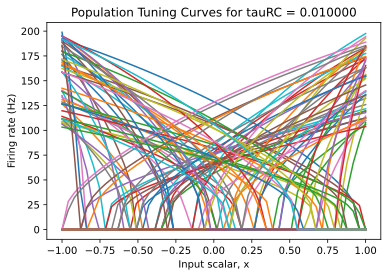

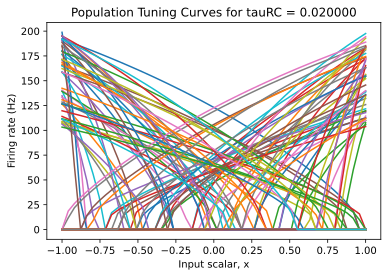

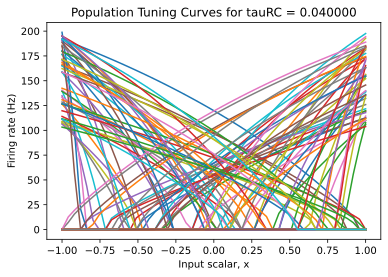

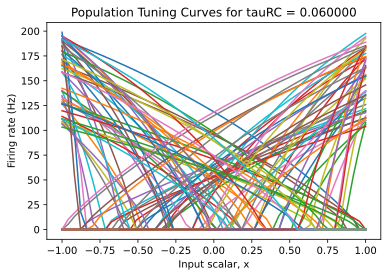

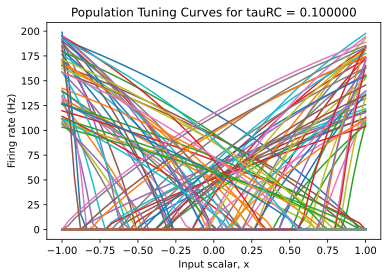

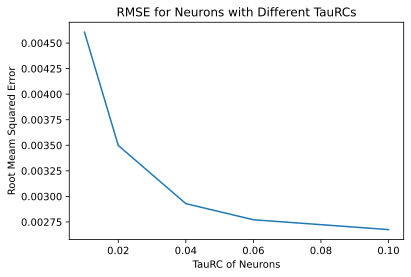

In [5]:
# ✍ 
numNeurons = 100
dimensions =1 
radius = 1
tauRef = 0.002
tauRCs = [0.01,0.02,0.04,0.06,0.1]
radius = 1
RMSEs = []

def rootMeanSquared(actual, predicted):
    return np.sqrt(((predicted - actual)**2).mean())

for tauRC in tauRCs:
    model = nengo.Network(seed = 18945)
    with model: 
        ensemble1 = nengo.Ensemble(numNeurons, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                                  neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

        dummyConnection = nengo.Connection(ensemble1, ensemble1)

    with nengo.Simulator(model) as sim:
        evalPoints, activities = tuning_curves(ensemble1, sim)
        decoder = sim.data[dummyConnection].weights.T

    xhat = np.dot(activities, decoder)

    RMSE = rootMeanSquared(evalPoints, xhat)

    print("RMSE  for radius %f is: " %(radii)  + str(RMSE))
    
    RMSEs.append(RMSE)
    
    plt.figure()
    plt.plot(evalPoints, activities)
    plt.title("Population Tuning Curves for tauRC = %f"% (tauRC))
    plt.xlabel("Input scalar, x")
    plt.ylabel("Firing rate (Hz)")

plt.figure()
plt.title("RMSE for Neurons with Different TauRCs")
plt.plot(tauRCs, RMSEs)
plt.xlabel('TauRC of Neurons')
plt.ylabel('Root Meam Squared Error')

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

✍ 
So as tauRef increases we get something approximating an exponential increase in the value of RMSE, and as tauRC increases we get the reverse (something approaching an exponential decrease in RMSE). In terms of the tuning curves,  the curves tend to stay at or near their maximum firing rate over a wider set of input values when tauRef is high, and tend to drop to their minimum firing rate (0), more quickly and stay their for longer when tauRC is low. So, obviously this error value has a lot to do with the function we are trying to decode (the identity function in this case). In order to approximate this linear function most effectively, we want tuning curves that generally have more linear behaviour. Meaning that we want curves that somewhat linearly move from their maxiumum firing rate to their minimum firing rate (or vice versa) given increasing values of x. Since higher values of tauRef and lower values of tauRC result in more non-linearity in the tuning curves, these populations are worse at approximating linear functions. 


# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0, 0.5, 'Output')

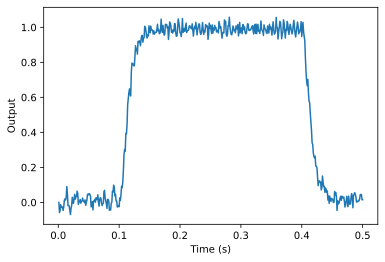

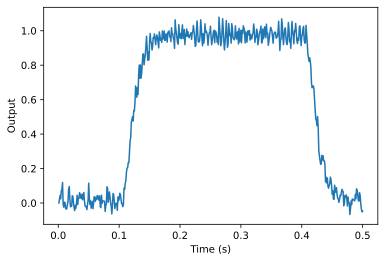

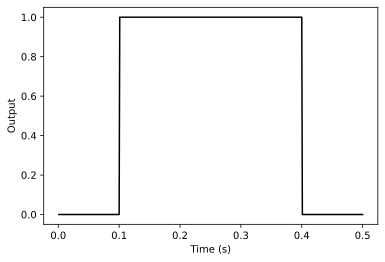

In [6]:
# ✍ 
T = 0.5
numNeurons1 = 100
numNeurons2 = 50
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
radius = 1

model = nengo.Network(seed = 18945)
with model: 
    ensemble1 = nengo.Ensemble(numNeurons1, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                              neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

    ensemble2 = nengo.Ensemble(numNeurons2, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                      neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

    stimulus = nengo.Node(lambda t: 0 if t<= 0.1 else (1 if t <= 0.4 else 0))

    Connection1 = nengo.Connection(stimulus, ensemble1)
    Connection2 = nengo.Connection(ensemble1, ensemble2, synapse = 0.01)

    probeStim = nengo.Probe(stimulus)
    probeE1 = nengo.Probe(ensemble1, synapse = 0.01)
    probeE2 = nengo.Probe(ensemble2, synapse = 0.01)

sim=nengo.Simulator(model)
sim.run(T)
    
plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeE1])
plt.xlabel('Time (s)')
plt.ylabel('Output')

plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeE2])
plt.xlabel('Time (s)')
plt.ylabel('Output')

plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeStim], c='k')
plt.xlabel('Time (s)')
plt.ylabel('Output')


        



**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0, 0.5, 'Output')

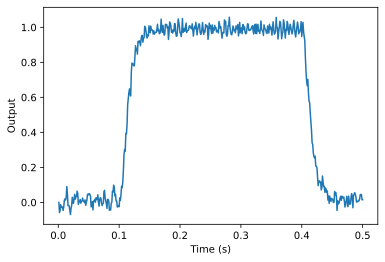

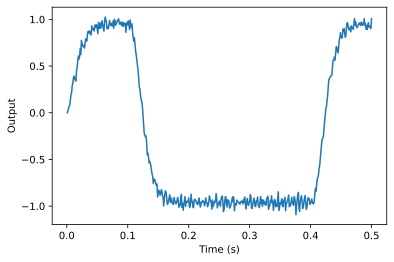

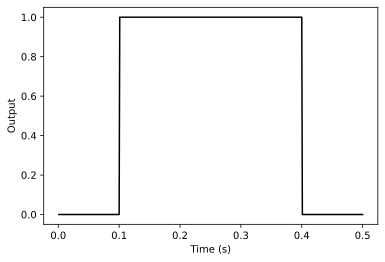

In [7]:
# ✍ 
T = 0.5
numNeurons1 = 100
numNeurons2 = 50
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
radius = 1

def stimFunc(t):
    return 1 - 2*t

model = nengo.Network(seed = 18945)
with model: 
    ensemble1 = nengo.Ensemble(numNeurons1, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                              neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

    ensemble2 = nengo.Ensemble(numNeurons2, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                      neuron_type = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef))

    stimulus = nengo.Node(lambda t: 0 if t<= 0.1 else (1 if t <= 0.4 else 0))

    Connection1 = nengo.Connection(stimulus, ensemble1)
    Connection2 = nengo.Connection(ensemble1, ensemble2, function = stimFunc, synapse = 0.01)

    probeStim = nengo.Probe(stimulus)
    probeE1 = nengo.Probe(ensemble1, synapse = 0.01)
    probeE2 = nengo.Probe(ensemble2, synapse = 0.01)

sim=nengo.Simulator(model)
sim.run(T)
    
plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeE1])
plt.xlabel('Time (s)')
plt.ylabel('Output')

plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeE2])
plt.xlabel('Time (s)')
plt.ylabel('Output')

plt.figure()
plt.title("")
plt.plot(sim.trange(), sim.data[probeStim], c='k')
plt.xlabel('Time (s)')
plt.ylabel('Output')

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?


The equation of an intregrator is: 
$\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{u}$


The matrices A and B in a LTI dynamical system are as follows: 

$$\mathbf{A} = \dfrac{1}{\tau} (\mathbf{A^{\prime} - I}), \hspace{5cm} \mathbf{B} = {\tau} \mathbf{B^{\prime}}$$

In the case of an integrator we have 
$$\mathbf{A} = 0 \hspace{2cm} and \hspace{2cm} \mathbf{B} = \mathbf{I}$$

In other words 
$$\mathbf{A^{\prime}} = \mathbf{I} \hspace{5cm}  \mathbf{B^{\prime}} = {\tau}\mathbf{I}$$

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

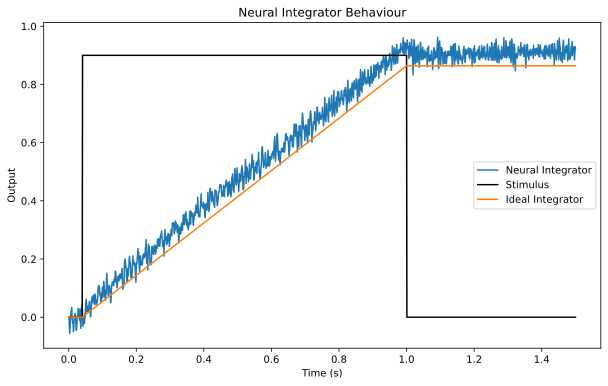

In [8]:
# ✍ 
def integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction):

    def recurrentFeedback(t):
        return 0.05*t


    model = nengo.Network()
    with model: 
        ensemble1 = nengo.Ensemble(numNeurons, dimensions = dimensions, radius = radius, max_rates = nengo.dists.Uniform(100,200),
                                  neuron_type = neuronType)

        stimulus1 = nengo.Node(stimulusFunction)


        connection1 = nengo.Connection(stimulus1, ensemble1, function = recurrentFeedback, synapse = 0.005)
        connection2 = nengo.Connection(ensemble1, ensemble1, synapse = 0.05)

        probeStim = nengo.Probe(stimulus1)
        probeEns = nengo.Probe(ensemble1, synapse = 0.01)

    sim=nengo.Simulator(model)
    sim.run(T)
    
    idealIntegrator = np.cumsum(sim.data[probeStim])*T/len(sim.data[probeStim])


    plt.figure(figsize= (10,6))
    plt.title("Neural Integrator Behaviour")
    plt.plot(sim.trange(), sim.data[probeEns], label = "Neural Integrator")
    plt.plot(sim.trange(), sim.data[probeStim], c='k', label = "Stimulus")
    plt.plot(sim.trange(), idealIntegrator, label = "Ideal Integrator")
    plt.xlabel('Time (s)')
    plt.ylabel('Output')
    plt.legend()
    
    
T = 1.5
numNeurons = 200
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
neuronType = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef)
stimulusFunction = lambda t: 0 if t<= 0.04 else (0.9 if t <= 1 else 0)

integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction)


**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

✍ $$\int_{0.04}^1 0.9 \,dt = {0.9t}\bigg\rvert_{0.04}^{1} = {(1)(0.9) - (0.04)(0.9)} =  0.864 $$
The above equation is obviously only true between the times of 0.04 and 1. For times before 0.04 the value of the ideal curve is 0 and for times after 1 it maintains a value of 0.864 (calculated above)

The simulated result closely resembles the ideal, although there is obviously some noise present. The other primary difference is that the simulated result seems to slightly overestimate the ideal


**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

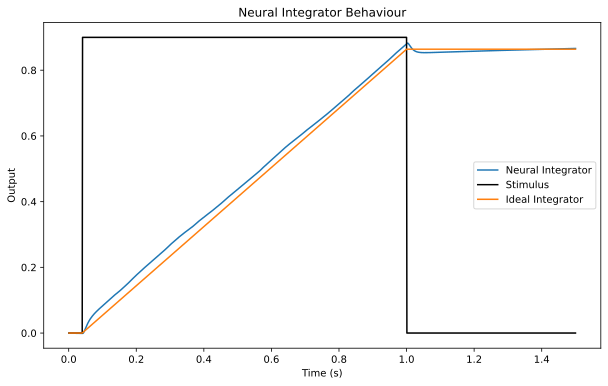

In [9]:
# ✍ 
T = 1.5
numNeurons = 200
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
inputValue = 0.9
neuronType = nengo.LIFRate(tau_rc = tauRC, tau_ref = tauRef)

stimulusFunction = lambda t: 0 if t<= 0.04 else (0.9 if t <= 1 else 0)

integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction)


**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

✍ 
The most obvious difference is that the noise is greatly reduced. Interestingly, while the neural integrator still overestimates the ideal for the duration of the step, it seems to underestimate it once the step has actually completed (although there is some element of randomness here stemming from the generation of the neurons in the ensembles). I believe that these deviations are likely explained by the diffence in time constant values. It makes sense that since the time constant for the input is lower than the post synaptic time constant of the recurrent connection the value outputted by the neural integrator would accumlate more quickly, resulting in overestimation. This hypothesis can be confirmed by increasing the input time constant to the same value as the reccurent one, which results in a better estimate. Likewise making the input constant bigger starts to result in underestimation during the ramp period. I am not sure that I have a clear explanation for the underestimation post ramp present in d), although based on lecture notes it seems to have something to do with a "value drift" phenomenom, which contributes to the overall error  

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

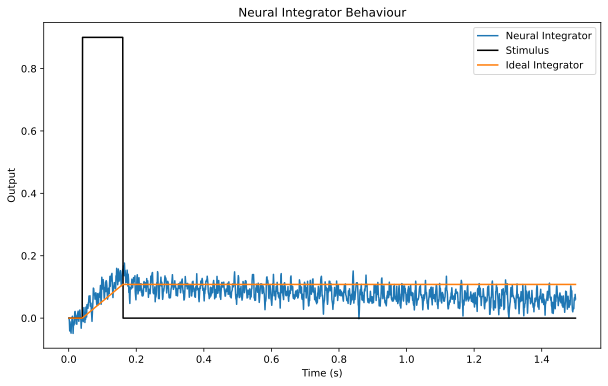

In [10]:
# ✍ 

T = 1.5
numNeurons = 200
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
neuronType = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef)
stimulusFunction = lambda t: 0 if t<= 0.04 else (0.9 if t <= 0.16 else 0)

integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction)

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

✍ The ideal equation is as follows: 
$$\int_{0.04}^{0.16} 0.9 \,dt = {0.9t}\bigg\rvert_{0.04}^{0.16} = {(0.16)(0.9) - (0.04)(0.9)} =  0.108 $$ 
The above equation is obviously only true between the times of 0.04 and 0.16. For times before 0.04 the value of the ideal curve is 0 and for times after 0.16 it maintains a value of 0.108 (calculated above)

So a couple of notable things in terms of comparing to b). The first is that for different random seeds, the steady state value of this neural integrator seems to alternate quite often between over and underestimating the actual ideal value. Obviously these integrators also don't build up to near the input value but that was simply a quirk of the step being approximately 1 second long in the previous examples... I would say that this neural integrator generally works as expected and has similar drift to the previous examples (although it is more visible in this case because we are examining the steady state situation over a longer period of time, and the drift appears more noticeable because the relative steady state value of the ideal integrator is smaller. 

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

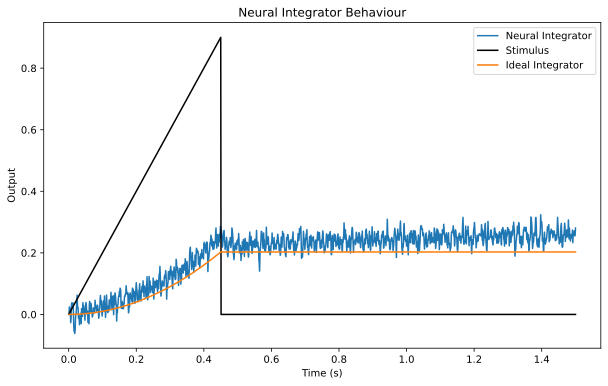

In [11]:
# ✍ 

T = 1.5
numNeurons = 200
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
neuronType = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef)
stimulusFunction = lambda t: 0 if t<= 0 else (t*2 if t <= 0.45 else 0)

integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction)

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

✍ The ideal equation of the curve is as follows: 
$$\int_{0}^{0.45} 2t \,dt = {t^2}\bigg\rvert_{0}^{0.45} = {(0.45)^2} =  0.2025 $$ 
The above equation is obviously only true between the times of 0 and 0.45. For times before 0 the value of the ideal curve is 0 and for times after 0.45 it maintains a value of 0.2025 (calculated above)

The ensemble represents a quadratic curve which levels off. This makes perfect sense given the 2t ramp input function. The neural inetrgator once again closely resembles the ideal. 


**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

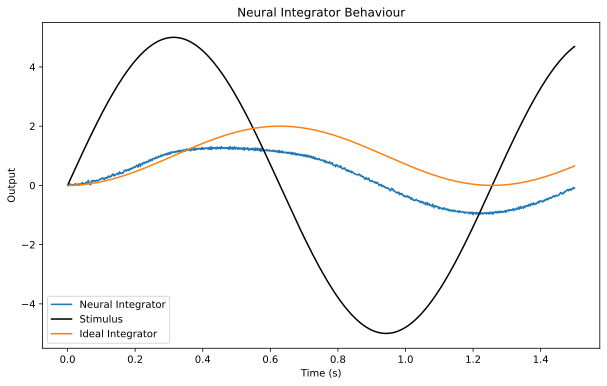

In [12]:
# ✍ 
T = 1.5
numNeurons = 200
dimensions =1 
radius = 1
tauRef = 0.002
tauRC = 0.02
neuronType = nengo.LIF(tau_rc = tauRC, tau_ref = tauRef)
stimulusFunction = lambda t: 5*np.sin(5*t)

integrator(T, numNeurons, dimensions, radius, neuronType, stimulusFunction)

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

✍ $$\int_{0}^{T} 5sin(5t) \,dt =  -cos(5t)\bigg\rvert_{0}^{T} = {-cos(5T) - (-1) } = 1 - cos(5T) $$ 
The ensemble should represent the integral of 5sin(5t) which as shown above is 1 - cos(5T). The model does an okay job although it does seem further off the ideal behaviour than in previous examples. Actually, super interestingly, the model seems to stick with the ideal initially and then quite quickly begins approximating -cos(5t) instead of 1-cos(5t). This becomes significantly more visible if you increase the duration of the simulation to something like 5 seconds. This seems to quite clearly be related to the radius values of the neurons. Presumably, the neurons are saturating at +1 and then attempting to follow the curve from there, resulting in a down shifted cos function. This hypothesis is confirmed by increasing the radius of the neurons to 2, which results in them approximating the ideal integrator very well. Very neat!

**l) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

✍ \<YOUR SOLUTION HERE\>

In [13]:
# ✍ <YOUR SOLUTION HERE>